In [42]:
import numpy as np
import matplotlib.pyplot as plt
import math

G = 6.6743015e-11
Eps0 = 8.8541878128e-12

class Particle:
    def __init__(self, position, inertia: (float, float, float), mass, charge : float):
        self.position = np.array(position)
        self.inertia = np.array(inertia)
        self.mass = mass
        self.charge = charge
        
    def force(self, p) -> float:
        ds = np.sum((self.position-p.position)**2)
        Fg = G * self.mass * p.mass / ds
        Fc = self.charge * p.charge / (4 * math.pi * Eps0 * ds)
        return Fg - Fc
    
    
    def forceV(self, p) -> np.ndarray:
        diff = p.position-self.position
        length = np.linalg.norm(diff)
        return (diff/length)*self.force(p)
        
    def move(self, t: float):
        self.position = self.position + self.inertia * t 
        
    def apply_force(self, f: np.ndarray, t: float):
        self.inertia = self.inertia + f*(t/self.mass)

class System:
    def __init__(self, particles: [Particle], t: float):
        self.t = t
        self.particles = particles
        
    def step(self):
        for i in range(0, len(self.particles)):
            p1 = self.particles[i]
            for j in range(i+1, len(self.particles)):
                p2 = self.particles[j]
                f = p1.forceV(p2)
                p1.apply_force(f, self.t)
                p2.apply_force(-f, self.t)
                self.particles[j] = p2
        
            p1.move(self.t)
            self.particles[i] = p1

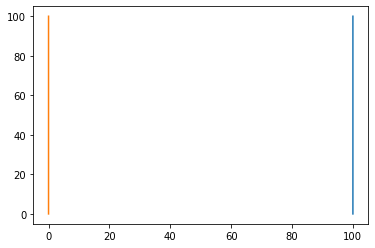

In [119]:
a = Particle((100,0,0), (0,0.0001,0), 0.5, 0.000000001)
b = Particle((0,0,0), (0,0.0001,0), 0.5, 0.000000001)
s = System([a, b], 100)

xs = [[], []]
ys = [[], []]
zs = [[], []]

n = range(0, 10000)
for i in n:
    xs[0].append(s.particles[0].position[0])
    ys[0].append(s.particles[0].position[1])
    zs[0].append(s.particles[0].position[2])
    xs[1].append(s.particles[1].position[0])
    ys[1].append(s.particles[1].position[1])
    zs[1].append(s.particles[1].position[2])
    s.step()
    #resistance
    for i in range(0, len(s.particles)):
        p = s.particles[i]
        p.inertia[0] = p.inertia[0] * 0.9
        p.inertia[2] = p.inertia[2] * 0.9
        s.particles[i] = p

plt.plot(xs[0], ys[0])
plt.plot(xs[1], ys[1])

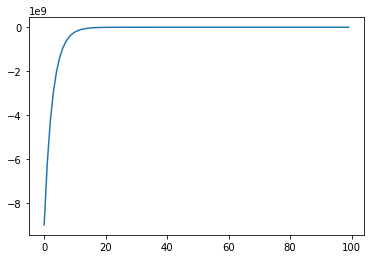

In [123]:
center = Particle((0,0,0), (0, 0, 0), 1, 1)
vals = []
for i in np.logspace(0, 8, 100):
    p = Particle((i,0,0), (0,0,0), 1, 1)
    vals.append(center.force(p))
    
plt.plot(vals)

In [13]:
from typing import Tuple

class PointMass:
    def __init__(self, weight: float, position: Tuple[float, float, float], inertia: Tuple[float, float, float]):
        self.weight = weight
        self.position = np.array(position)
        self.inertia = np.array(inertia)

    def distanceTo(self, point_mass: "PointMass") -> float:
        return np.linalg.norm(self.position - point_mass.position)

    def directionTo(self, point_mass: "PointMass") -> Tuple[float, float, float]:
        return (point_mass.position - self.position) / self.distanceTo(point_mass)

    def move(self, t: float):
        self.position = self.position + self.inertia * t

class Spring:
    def __init__(self, start_point: PointMass, end_point: PointMass, spring_constant: float, length: float):
        self.start_point = start_point
        self.end_point = end_point
        self.spring_constant = spring_constant
        self.length = length
        
    def force(self) -> float:
        return (length - self.start_point.distanceTo(self.endpoint)) * weight

    def direction(self) -> Tuple[float, float, float]:
        return self.start_point.directionTo(self.end_point)

    def applyForce(self, t: float):
        f = self.force() * self.direction()
        self.start_point.inertia = self.start_point.inertia - f * t
        self.end_point.inertia = self.end_point.inertia + f * t
  
class SpringsAndJoints:
    def __init__(self, springs: [Spring], joints: [PointMass]):
        self.springs = springs
        self.joints = joints

    def step(self, t: float):
        for i in range(0, len(self.springs)):
            self.springs[i].applyForce(t)

        for i in range(0, len(self.joints)):
            self.joints[i].move(t)
